### Load packages and data files from previous notebook

In [2]:
## Imports
from scipy import io
import pandas as pd
import numpy as np
import os
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [3]:
## Load Matlab files
file_path = r'C:\Users\natha\Desktop\bootcamp_repo-1\NW_Atlantic_Fishery_Sustainability\data\interim'
AMO_file, biomass_file, ecosystem_file, landings_file, ocean_temp_file = [fr'{file_path}\AMO_data.csv', \
    fr'{file_path}\biomass_data.csv', fr'{file_path}\ecosystem_data.csv', fr'{file_path}\landings_data.csv', \
    fr'{file_path}\ocean_temp_data.csv']

AMO_df = pd.read_csv(AMO_file).drop(['Unnamed: 0'], axis=1)
biomass_df = pd.read_csv(biomass_file).drop(['Unnamed: 0'], axis=1)
ecosystem_df = pd.read_csv(ecosystem_file).drop(['Unnamed: 0'], axis=1)
landings_df = pd.read_csv(landings_file).drop(['Unnamed: 0'], axis=1)
ocean_temp_df = pd.read_csv(ocean_temp_file).drop(['Unnamed: 0'], axis=1)

### Generate df reports and save to files

In [4]:
def make_html_report (df, name):
    report = df.profile_report(sort=None, html={'style':{'full_width': True}}, progress_bar=True)
    report.to_file(fr"C:\Users\natha\Desktop\bootcamp_repo-1\NW_Atlantic_Fishery_Sustainability\reports\{name}_data_report.html")
    print(f'{name} done!')
'''
make_html_report(AMO_df, 'AMO')
make_html_report(biomass_df, 'biomass')
make_html_report(ecosystem_df, 'ecosystem')
make_html_report(landings_df, 'landings')
make_html_report(ocean_temp_df, 'ocean_temp')
'''

"\nmake_html_report(AMO_df, 'AMO')\nmake_html_report(biomass_df, 'biomass')\nmake_html_report(ecosystem_df, 'ecosystem')\nmake_html_report(landings_df, 'landings')\nmake_html_report(ocean_temp_df, 'ocean_temp')\n"

## Data defining:

### In Biomass:
biomass in tons per square kilometer (t/km^2).
biomass_index in tons.
abundance in number per square kilometer.
abundance_index in number.

### In Landings:
landings_biomass in tons per square kilometer (t/km^2).
landings_biomass_index in tons.
landings_abundance in number per square kilometer.
landings_abundance_index in number.

In [5]:
biomass_spec =  list(set(biomass_df['species'].values))
biomass_loc = list(set(biomass_df['ecosystem'].values))
landings_spec = list(set(landings_df['species'].values))
landings_loc = list(set(landings_df['ecosystem'].values))
biomass_spec.sort()
biomass_loc.sort()
landings_spec.sort()
landings_loc.sort()

print(biomass_spec[0:9])
print(landings_spec[0:9])

['AFRICAN_POMPANO', 'ALEWIFE', 'AMERICAN_EEL', 'AMERICAN_LOBSTER', 'AMERICAN_SAND_LANCE', 'AMERICAN_SHAD', 'ATLANTIC_ANGEL_SHARK', 'ATLANTIC_ARGENTINE', 'ATLANTIC_BONITO']
['American_plaice', 'Atlantic_butterfish', 'Atlantic_cod', 'Atlantic_croaker', 'Atlantic_halibut', 'Atlantic_herring', 'Atlantic_mackerel', 'Atlantic_redfishes_NS', 'Atlantic_wolffish']


In [6]:
print(biomass_df.columns)
print(landings_df.columns)

biomass_df.drop(['biomass_SE', 'abundance_SE', 'biomass_index_SE', 'abundance_index_units', 'abundance_index_SE'], 
    axis=1, inplace=True)
landings_df.rename(columns={'landings_biomass':'biomass', 'landings_abund':'abundance', 
    'landings_biomass_index':'biomass_index', 'landings_abund_index':'abundance_index'}, inplace=True)
print(biomass_df.columns)
print(landings_df.columns)

Index(['ecosystem', 'species', 'year', 'biomass', 'biomass_SE', 'abundance',
       'abundance_SE', 'biomass_index', 'biomass_index_SE', 'abundance_index',
       'abundance_index_units', 'abundance_index_SE', 'avg_len', 'avg_mass',
       'source', 'agency', 'season'],
      dtype='object')
Index(['ecosystem', 'species', 'year', 'landings_biomass', 'landings_abund',
       'landings_biomass_index', 'landings_abund_index', 'avg_len', 'avg_mass',
       'source', 'agency', 'season'],
      dtype='object')
Index(['ecosystem', 'species', 'year', 'biomass', 'abundance', 'biomass_index',
       'abundance_index', 'avg_len', 'avg_mass', 'source', 'agency', 'season'],
      dtype='object')
Index(['ecosystem', 'species', 'year', 'biomass', 'abundance', 'biomass_index',
       'abundance_index', 'avg_len', 'avg_mass', 'source', 'agency', 'season'],
      dtype='object')


In [7]:
fish_df = pd.concat([biomass_df, landings_df], ignore_index=True)
print(fish_df.tail())
print(fish_df.shape)
print(biomass_df.shape)
print(landings_df.shape)

      ecosystem    species  year  biomass  abundance  biomass_index  \
31017        CB  Skates_NS  2003      NaN        NaN           62.6   
31018        CB  Skates_NS  2005      NaN        NaN           38.7   
31019        CB  Skates_NS  2006      NaN        NaN           20.4   
31020        CB  Skates_NS  2007      NaN        NaN           68.4   
31021        CB  Skates_NS  2008      NaN        NaN          265.7   

       abundance_index  avg_len  avg_mass source agency season  
31017              NaN      NaN       NaN     nd     nd     nd  
31018              NaN      NaN       NaN     nd     nd     nd  
31019              NaN      NaN       NaN     nd     nd     nd  
31020              NaN      NaN       NaN     nd     nd     nd  
31021              NaN      NaN       NaN     nd     nd     nd  
(31022, 12)
(26137, 12)
(4885, 12)


In [8]:
fish_df.columns

Index(['ecosystem', 'species', 'year', 'biomass', 'abundance', 'biomass_index',
       'abundance_index', 'avg_len', 'avg_mass', 'source', 'agency', 'season'],
      dtype='object')

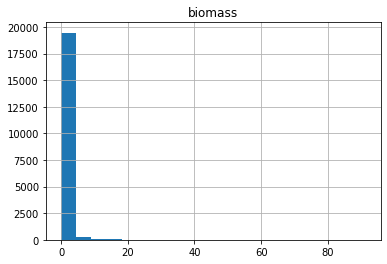

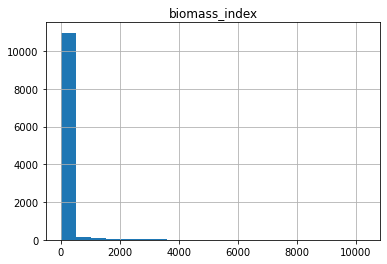

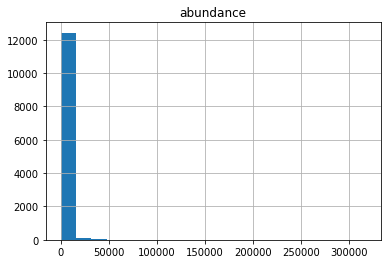

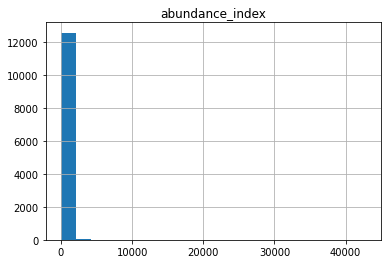

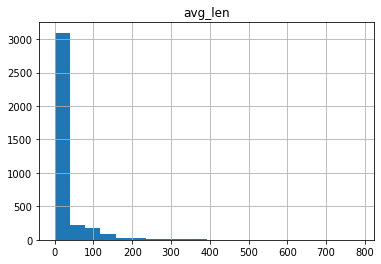

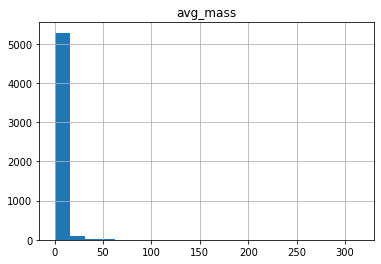

In [9]:
hist_biomass = fish_df.hist(column='biomass', bins=20)
hist_biomass_index = fish_df.hist(column='biomass_index', bins=20)
hist_abundance = fish_df.hist(column='abundance', bins=20)
hist_abundance_index = fish_df.hist(column='abundance_index', bins=20)
hist_len = fish_df.hist(column='avg_len', bins=20)
hist_mass = fish_df.hist(column='avg_mass', bins=20)

In [10]:
fish_df[fish_df.biomass >= fish_df['biomass'].quantile(.75)]

,ecosystem,species,year,biomass,abundance,biomass_index,abundance_index,avg_len,avg_mass,source,agency,season
46,CB,Atlantic_croaker,2002,2.299399,NaN,NaN,11670.824107,0.250977,0.210925,ChesMMAP_Survey,VIMS,May-Sep
47,CB,Atlantic_croaker,2003,1.238667,NaN,NaN,5301.103004,0.242012,0.197755,ChesMMAP_Survey,VIMS,May-Sep
48,CB,Atlantic_croaker,2004,4.625904,NaN,NaN,18360.310500,0.262455,0.263261,ChesMMAP_Survey,VIMS,May-Sep
49,CB,Atlantic_croaker,2005,2.996353,NaN,NaN,13337.858558,0.256941,0.239844,ChesMMAP_Survey,VIMS,May-Sep
50,CB,Atlantic_croaker,2006,3.046045,NaN,NaN,15192.374120,0.253414,0.233842,ChesMMAP_Survey,VIMS,May-Sep
...,...,...,...,...,...,...,...,...,...,...,...,...
30244,SNE,Shortfin_squid,1998,0.598365,NaN,NaN,NaN,NaN,NaN,CFDBS,NMFS/NEFSC,nd
30246,SNE,Shortfin_squid,2000,0.165769,NaN,NaN,NaN,NaN,NaN,CFDBS,NMFS/NEFSC,nd
30249,SNE,Shortfin_squid,2003,0.182335,NaN,NaN,NaN,NaN,NaN,CFDBS,NMFS/NEFSC,nd
30251,SNE,Shortfin_squid,2005,0.237241,NaN,NaN,NaN,NaN,NaN,CFDBS,NMFS/NEFSC,nd


Later modeling is decided to work with recent data only (last 30 years).

In [11]:
max_yr = max(fish_df['year'])
min_yr = max_yr - 30

fish_df_30yr = fish_df[fish_df['year']>= min_yr]
print(fish_df_30yr.shape)

(25776, 12)


Consolidate species list that includes distinct duplicate due to formatting differences (all caps, etc.)

In [12]:
fish_df_30yr['species_lower'] = fish_df_30yr['species'].str.lower()
fish_df_30yr_spec =  list(set(fish_df_30yr['species_lower'].values))
fish_df_30yr_spec.sort()
print(fish_df_30yr_spec[0:9])
len(fish_df_30yr_spec)

['african_pompano', 'alewife', 'alewife_and_blueback_herring', 'alewife_and_river_herring', 'american_butterfish', 'american_eel', 'american_eel_age-1+', 'american_eel_yoy/larvae', 'american_fourspot_flounder']


C:\Users\natha\AppData\Local\Temp\ipykernel_4516\4111078461.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fish_df_30yr['species_lower'] = fish_df_30yr['species'].str.lower()


406

In [13]:
species_repl = [species.replace('-','') for species in fish_df_30yr_spec]
species_young = [species for species in fish_df_30yr_spec if ('yoy' in species) or ('y-o-y' in species)]
print(species_young, len(species_young))


['american_eel_yoy/larvae', 'american_sand_lance_yoy', 'anchovy_spp_yoy-est', 'atlantic_herring_yoy-est', 'bay_anchovy_yoy', 'black_sea_bass_yoy', 'blue_catfish_yoy', 'blue_crab_yoy', 'channel_catfish_yoy', 'conger_eel_yoy/larvae', 'gadus_spp._yoy/larvae', 'silver_perch_yoy', 'spot_yoy', 'striped_bass_yoy', 'summer_flounder_yoy', 'weakfish_yoy', 'white_catfish_yoy', 'white_perch_yoy', 'y-o-y_winter_flounder'] 19


Verify "yoy" (young of year) species have adult species data.

In [14]:
species_repl = [species.replace('-est','') for species in species_young]
species_repl = [species.replace('_yoyest','') for species in species_repl]
species_repl = [species.replace('_yoy','') for species in species_repl]
species_repl = [species.replace('y-o-y_','') for species in species_repl]
species_adult = [species.replace('/larvae','') for species in species_repl]
print(species_adult, len(species_adult))

['american_eel', 'american_sand_lance', 'anchovy_spp', 'atlantic_herring', 'bay_anchovy', 'black_sea_bass', 'blue_catfish', 'blue_crab', 'channel_catfish', 'conger_eel', 'gadus_spp.', 'silver_perch', 'spot', 'striped_bass', 'summer_flounder', 'weakfish', 'white_catfish', 'white_perch', 'winter_flounder'] 19


In [15]:
fish_adult = fish_df_30yr[fish_df_30yr['species_lower'].isin(species_adult)]
fish_young = fish_df_30yr[fish_df_30yr['species_lower'].isin(species_young)]
print(fish_adult.shape)
print(fish_young.shape)

(3476, 13)
(332, 13)


just plot 30yr data by species, color and overlay

relate 19 juvenile to 19 adult, or less depending on data filled out

maybe pair ecosystems 1:1

In [16]:
print(list(set(fish_young['ecosystem'].values)))
fish_young.isna().sum()

['LIS', 'CTS', 'CB']


ecosystem            0
species              0
year                 0
biomass            294
abundance          294
biomass_index      296
abundance_index      7
avg_len             73
avg_mass           296
source               0
agency               0
season               0
species_lower        0
dtype: int64

In [17]:
print(list(set(fish_adult['ecosystem'].values)))
fish_adult.isna().sum()

['HR', 'CTS', 'Del', 'GB', 'NJ', 'GoM', 'NB', 'CB', 'MAB', 'LIS', 'SNE']


ecosystem             0
species               0
year                  0
biomass            1375
abundance          2016
biomass_index      2092
abundance_index    1930
avg_len            2887
avg_mass           2730
source                0
agency                0
season                0
species_lower         0
dtype: int64

In [18]:
print(list(set(fish_adult['species_lower'].values)))
print(len(list(set(fish_adult['species_lower'].values))))
print(list(set(fish_young['species_lower'].values)))
print(len(list(set(fish_young['species_lower'].values))))

['summer_flounder', 'bay_anchovy', 'blue_crab', 'conger_eel', 'white_catfish', 'white_perch', 'american_eel', 'silver_perch', 'atlantic_herring', 'weakfish', 'american_sand_lance', 'striped_bass', 'channel_catfish', 'winter_flounder', 'black_sea_bass', 'spot']
16
['channel_catfish_yoy', 'white_perch_yoy', 'y-o-y_winter_flounder', 'gadus_spp._yoy/larvae', 'conger_eel_yoy/larvae', 'spot_yoy', 'white_catfish_yoy', 'atlantic_herring_yoy-est', 'striped_bass_yoy', 'american_eel_yoy/larvae', 'weakfish_yoy', 'american_sand_lance_yoy', 'black_sea_bass_yoy', 'silver_perch_yoy', 'summer_flounder_yoy', 'bay_anchovy_yoy', 'blue_catfish_yoy', 'anchovy_spp_yoy-est', 'blue_crab_yoy']
19


In [19]:
csv_folder = r"C:\Users\natha\Desktop\bootcamp_repo-1\NW_Atlantic_Fishery_Sustainability\data\interim"
fish_adult.to_csv(fr'{csv_folder}\fish_adult.csv')
fish_young.to_csv(fr'{csv_folder}\fish_young.csv')